<a href="https://colab.research.google.com/github/Jahnavi-2410/Fundamentals-of-mi/blob/main/Fundamentals_Of_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 14ms/step - loss: 0.6325 - accuracy: 0.8107 - val_loss: 0.3594 - val_accuracy: 0.8789
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 0.2474 - accuracy: 0.9223 - val_loss: 0.2748 - val_accuracy: 0.9153
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1585 - accuracy: 0.9514 - val_loss: 0.1754 - val_accuracy: 0.9473
Epoch 4/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1110 - accuracy: 0.9650 - val_loss: 0.1258 - val_accuracy: 0.9627
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0821 - accuracy: 0.9740 - val_loss: 0.1464 - val_accuracy: 0.9588
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0589 - accuracy: 0.9806 - val_loss: 0.1283 - val_accuracy: 0.9652
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0440 - accuracy: 0.9858 - val_loss: 0.1207 - val_accuracy: 0.9689

**Plotting a validation accuracy comparison**

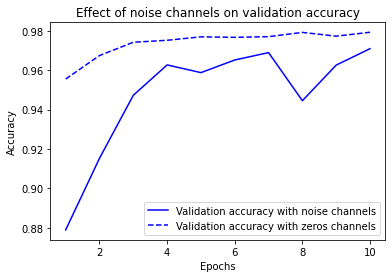

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

375/375 [==============================] - 3s 8ms/step - loss: 1.7924 - accuracy: 0.3715 - val_loss: 2.7225 - val_accuracy: 0.0993
Epoch 21/100
375/375 [==============================] - 3s 8ms/step - loss: 1.7580 - accuracy: 0.3891 - val_loss: 2.7550 - val_accuracy: 0.0997
Epoch 22/100
375/375 [==============================] - 3s 8ms/step - loss: 1.7281 - accuracy: 0.4002 - val_loss: 2.7921 - val_accuracy: 0.1026
Epoch 23/100
375/375 [==============================] - 3s 8ms/step - loss: 1.6995 - accuracy: 0.4110 - val_loss: 2.8409 - val_accuracy: 0.1042
Epoch 24/100
375/375 [==============================] - 3s 8ms/step - loss: 1.6686 - accuracy: 0.4219 - val_loss: 2.8743 - val_accuracy: 0.1016
Epoch 25/100
375/375 [==============================] - 3s 8ms/step - loss: 1.6398 - accuracy: 0.4347 - val_loss: 2.8993 - val_accuracy: 0.1002
Epoch 26/100
375/375 [==============================] - 3s 8ms/step - loss: 1.6094 - accuracy: 0.4458 - val_loss: 2.9497 - val_accuracy: 0.1053
Epoch

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 1075.7363 - accuracy: 0.4041 - val_loss: 31.3521 - val_accuracy: 0.2965
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 4.2604 - accuracy: 0.2760 - val_loss: 2.3284 - val_accuracy: 0.2780
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 2.9843 - accuracy: 0.2481 - val_loss: 2.5261 - val_accuracy: 0.2888
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 3.6225 - accuracy: 0.2609 - val_loss: 2.2163 - val_accuracy: 0.2751
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 4.7912 - accuracy: 0.2621 - val_loss: 3.2901 - val_accuracy: 0.2691
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 3.1377 - accuracy: 0.2852 - val_loss: 2.2754 - val_accuracy: 0.2877
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.6649 - accuracy: 0.2690 - val_loss: 2.1178 - val_accuracy: 0.2690
Ep

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 0.3734 - accuracy: 0.9121 - val_loss: 0.1375 - val_accuracy: 0.9642
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1435 - accuracy: 0.9626 - val_loss: 0.1401 - val_accuracy: 0.9670
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1121 - accuracy: 0.9737 - val_loss: 0.2044 - val_accuracy: 0.9628
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0956 - accuracy: 0.9781 - val_loss: 0.1902 - val_accuracy: 0.9670
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0844 - accuracy: 0.9818 - val_loss: 0.2152 - val_accuracy: 0.9698
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0784 - accuracy: 0.9843 - val_loss: 0.2339 - val_accuracy: 0.9709
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0736 - accuracy: 0.9852 - val_loss: 0.2356 - val_accuracy: 0.9731
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6608 - accuracy: 0.8379 - val_loss: 0.3579 - val_accuracy: 0.9038
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3510 - accuracy: 0.9039 - val_loss: 0.3065 - val_accuracy: 0.9151
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3154 - accuracy: 0.9116 - val_loss: 0.2894 - val_accuracy: 0.9199
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2995 - accuracy: 0.9161 - val_loss: 0.2824 - val_accuracy: 0.9214
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2896 - accuracy: 0.9186 - val_loss: 0.2754 - val_accuracy: 0.9235
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2832 - accuracy: 0.9212 - val_loss: 0.2706 - val_accuracy: 0.9254
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2779 - accuracy: 0.9222 - val_loss: 0.2686 - val_accuracy: 0.9259
Epoch 

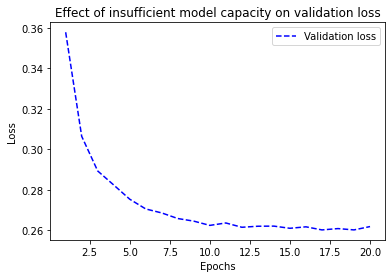

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3675 - accuracy: 0.8955 - val_loss: 0.2239 - val_accuracy: 0.9331
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1655 - accuracy: 0.9517 - val_loss: 0.1438 - val_accuracy: 0.9587
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1147 - accuracy: 0.9656 - val_loss: 0.1326 - val_accuracy: 0.9625
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0877 - accuracy: 0.9741 - val_loss: 0.1147 - val_accuracy: 0.9657
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0710 - accuracy: 0.9780 - val_loss: 0.1141 - val_accuracy: 0.9675
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0576 - accuracy: 0.9824 - val_loss: 0.0999 - val_accuracy: 0.9718
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0500 - accuracy: 0.9845 - val_loss: 0.0937 - val_accuracy: 0.9734
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 1s 33ms/step - loss: 0.5090 - accuracy: 0.7820 - val_loss: 0.3848 - val_accuracy: 0.8615
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3036 - accuracy: 0.9017 - val_loss: 0.3068 - val_accuracy: 0.8838
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2251 - accuracy: 0.9288 - val_loss: 0.2763 - val_accuracy: 0.8911
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1768 - accuracy: 0.9441 - val_loss: 0.2754 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1445 - accuracy: 0.9549 - val_loss: 0.2884 - val_accuracy: 0.8851
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1188 - accuracy: 0.9624 - val_loss: 0.2927 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0992 - accurac

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6496 - accuracy: 0.7373 - val_loss: 0.6072 - val_accuracy: 0.8064
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5606 - accuracy: 0.8459 - val_loss: 0.5255 - val_accuracy: 0.8388
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4684 - accuracy: 0.8836 - val_loss: 0.4476 - val_accuracy: 0.8647
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3857 - accuracy: 0.9006 - val_loss: 0.3822 - val_accuracy: 0.8808
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3198 - accuracy: 0.9123 - val_loss: 0.3440 - val_accuracy: 0.8776
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2700 - accuracy: 0.9217 - val_loss: 0.3087 - val_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2318 - accuracy: 0.9308 - val_loss: 0.2883 - val_accuracy: 0.8920
Epoch 8/20
30

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 8s 259ms/step - loss: 0.5403 - accuracy: 0.7466 - val_loss: 0.3074 - val_accuracy: 0.8834
Epoch 2/20
30/30 [==============================] - 7s 246ms/step - loss: 0.2700 - accuracy: 0.8947 - val_loss: 0.2721 - val_accuracy: 0.8910
Epoch 3/20
30/30 [==============================] - 8s 252ms/step - loss: 0.1523 - accuracy: 0.9417 - val_loss: 0.4890 - val_accuracy: 0.8119
Epoch 4/20
30/30 [==============================] - 7s 246ms/step - loss: 0.0948 - accuracy: 0.9683 - val_loss: 0.3566 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 7s 248ms/step - loss: 0.1024 - accuracy: 0.9801 - val_loss: 0.3364 - val_accuracy: 0.8799
Epoch 6/20
30/30 [==============================] - 7s 245ms/step - loss: 0.0070 - accuracy: 0.9995 - val_loss: 0.4885 - val_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 7s 246ms/step - loss: 8.1871e-04 - accuracy: 0.9999 - val_loss: 0.5927 - val_accuracy: 0.8836
Ep

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6350 - accuracy: 0.7606 - val_loss: 0.5139 - val_accuracy: 0.8611
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.4504 - accuracy: 0.8873 - val_loss: 0.4312 - val_accuracy: 0.8772
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3713 - accuracy: 0.9067 - val_loss: 0.3843 - val_accuracy: 0.8884
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3321 - accuracy: 0.9165 - val_loss: 0.3789 - val_accuracy: 0.8832
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3107 - accuracy: 0.9217 - val_loss: 0.3695 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2906 - accuracy: 0.9315 - val_loss: 0.3629 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2796 - accuracy: 0.9337 - val_loss: 0.3917 - val_accuracy: 0.8718
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.6155 - accuracy: 0.6740 - val_loss: 0.4957 - val_accuracy: 0.8351
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4993 - accuracy: 0.7871 - val_loss: 0.4033 - val_accuracy: 0.8819
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.4252 - accuracy: 0.8402 - val_loss: 0.3484 - val_accuracy: 0.8838
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3649 - accuracy: 0.8743 - val_loss: 0.3162 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3194 - accuracy: 0.8921 - val_loss: 0.3026 - val_accuracy: 0.8894
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2820 - accuracy: 0.9109 - val_loss: 0.2865 - val_accuracy: 0.8941
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2446 - accuracy: 0.9229 - val_loss: 0.2964 - val_accuracy: 0.8904
Epoch 8/20
30